In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [6]:
df = pd.read_csv("titanic.csv")

In [7]:
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()

In [8]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [9]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.5
df.loc[mask, "Survived"] = -1

In [10]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [11]:
base_model = LogisticRegression()

In [12]:
self_training_model = SelfTrainingClassifier(base_model, criterion='k_best')

In [13]:
self_training_model.fit(X, y)

SelfTrainingClassifier(criterion='k_best', estimator=LogisticRegression())

In [14]:
df["Predicted_Label"] = self_training_model.predict(X)

In [15]:
print(df.head(20))

    Survived  Pclass  Sex   Age     Fare  Predicted_Label
0         -1       3    1  34.5   7.8292                0
1          1       3    0  47.0   7.0000                1
2          0       2    1  62.0   9.6875                0
3          0       3    1  27.0   8.6625                0
4         -1       3    0  22.0  12.2875                1
5         -1       3    1  14.0   9.2250                0
6         -1       3    0  30.0   7.6292                1
7          0       2    1  26.0  29.0000                0
8          1       3    0  18.0   7.2292                1
9          0       3    1  21.0  24.1500                0
11        -1       1    1  46.0  26.0000                0
12         1       1    0  23.0  82.2667                1
13         0       2    1  63.0  26.0000                0
14        -1       1    0  47.0  61.1750                1
15        -1       2    0  24.0  27.7208                1
16        -1       2    1  35.0  12.3500                0
17        -1  

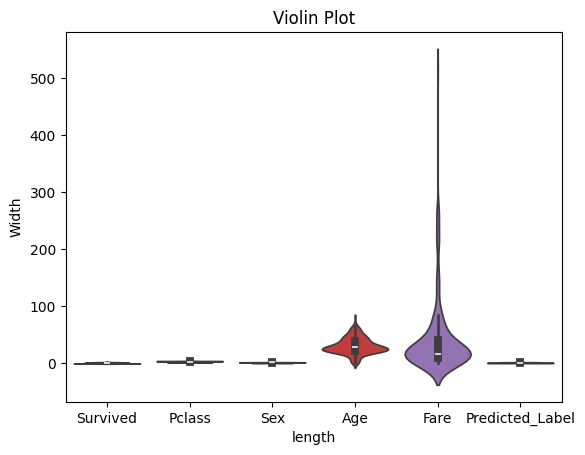

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Changed 'Violinplot' to 'violinplot' to match the correct function name in seaborn
sns.violinplot(df)
plt.title("Violin Plot")
plt.xlabel("length")
plt.ylabel("Width")
plt.show()